In [26]:
import pandas as pd
import matplotlib .pyplot as plt

#Carregar a base
df = pd.read_excel(r"BaseFuncionarios.xlsx")

df.head()

,ID RH,Nome,Sobrenome,Genero,Data de Nascimento,Endereço,Data de Contratacao,Data de Demissao,Salario,VR,VT,Cargo,Área,Horas Extras,Avaliação do Funcionário
0,195,ADELINO,WERNECK,M,1997-04-27,"Av. Guilherme Campos, 500 - Jardim Santa Geneb...",2015-04-23,NaT,12954,700,200,Coordenador,Administrativo,161,9.8
1,102,ADRIANO,SOUZA,M,1993-12-09,"Av. Limeira, 722 - Areião, Piracicaba - SP, 13...",2020-12-05,NaT,1635,500,225,Estagiário,Marketing,57,7.3
2,342,ALFREDO,ARAUJO,M,1986-08-14,"Av. Limeira, 722 - Areião, Piracicaba - SP, 13...",2020-04-02,NaT,11153,750,300,Coordenador,Marketing,70,8.7
3,320,ALINE,SILVA,F,1976-06-22,"Av. Paulista, 1230 - Bela Vista, São Paulo - S...",2015-08-13,2021-08-12,898,500,200,Estagiário,Operações,174,7.4
4,88,ALINE,SOUZA,F,1981-09-04,Condomínio Sorocaba Shopping Center - Av. Dr. ...,2020-03-29,NaT,18878,500,225,Gerente,Administrativo,132,8.3


In [19]:
import pandas as pd
import matplotlib .pyplot as plt
df["Data de Contratacao"] = pd.to_datetime(df["Data de Contratacao"], errors="coerce")
df["Data de Demissao"] = pd.to_datetime(df["Data de Demissao"],  errors="coerce")
df['Status'].value_counts()


KeyError: 'Status'

In [37]:
df['Status'] = df['Data de Demissao'].isna().map({True:"Ativo", False:"Inativo"})
df['Status'].value_counts()

Status
Ativo      155
Inativo     51
Name: count, dtype: int64

In [38]:
total_ativos = df[df['Status']== "Ativo"].shape[0]
total_inativos = df[df['Status']== "Inativo"].shape[0]
print(total_ativos)
print(total_inativos)

155
51


In [ ]:
total_contratacao=df["Data de Contratacao"].notna().sum()
print (total_contratacao)

206


In [ ]:
df["Folha Salarial"] = df["Salario"] + df["VT"] + df["VR"]
folha_salarial = df[df["Status"] == "Ativo"]["Folha Salarial"].sum()
print(folha_salarial)

folha_salarial = (df["Salario"] + df["VT"] + df["VR"])[df["Status"]=="Ativo"].sum()
print(folha_salarial)

1487553
1487553


Text(0.5, 0, 'Genero')

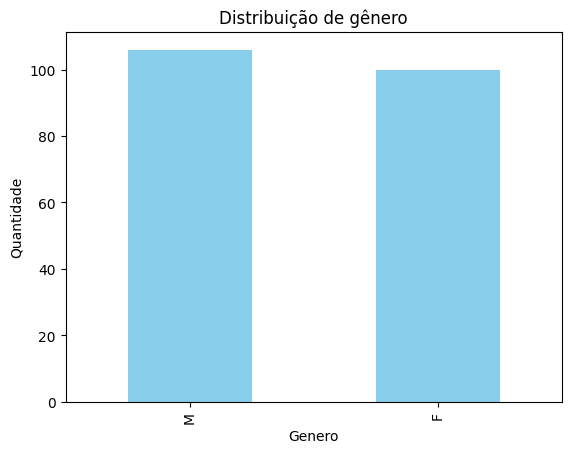

In [ ]:
df["Genero"].dropna().unique()
df ["Genero"].value_counts().plot(kind="bar", color="skyblue")
plt.title ("Distribuição de gênero")
plt.ylabel("Quantidade")
plt.xlabel("Genero")

In [ ]:
salario_area = df.groupby("Área")["Salario"].mean().sort_values(ascending=False)

print(salario_area)

R$Área
Logística         8072.312500
Financeiro        7978.925926
Marketing         7608.583333
Comercial         7398.441860
Operações         7381.650000
Administrativo    7118.576923
Name: Salario, dtype: float64


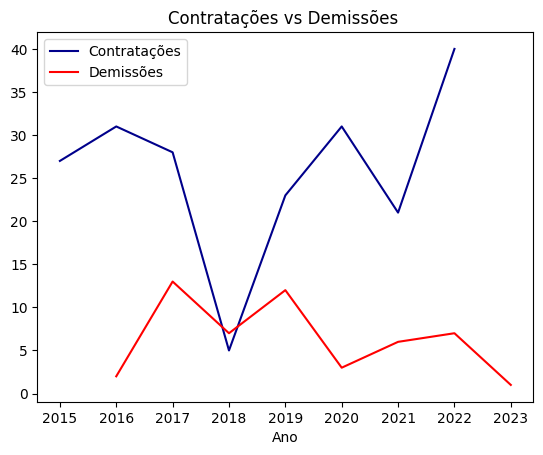

In [51]:
contratacoes_por_ano = df["Data de Contratacao"].dt.year.value_counts().sort_index()
demissoes_por_ano = df["Data de Demissao"].dropna().dt.year.value_counts().sort_index()
plt.plot(contratacoes_por_ano.index, contratacoes_por_ano.values, color='DarkBlue', label='Contratações' )
plt.plot(demissoes_por_ano.index, demissoes_por_ano.values, 'r', label='Demissões')
plt.xlabel('Ano')

plt.legend()
plt.title('Contratações vs Demissões ')
plt.show()


